In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from xgboost import XGBClassifier



import warnings


warnings.filterwarnings('ignore')

In [95]:
df_lp=pd.read_csv("low_popularity_spotify_data.csv")
df_hp=pd.read_csv("high_popularity_spotify_data.csv")

In [96]:
df_lp.head()

,time_signature,track_popularity,speechiness,danceability,playlist_name,track_artist,duration_ms,energy,playlist_genre,playlist_subgenre,...,track_album_id,playlist_id,track_id,valence,key,tempo,loudness,acousticness,liveness,track_album_name
0,4.0,23,0.0393,0.636,Rock Classics,Creedence Clearwater Revival,138053.0,0.746,rock,classic,...,4A8gFwqd9jTtnsNwUu3OQx,37i9dQZF1DWXRqgorJj26U,5e6x5YRnMJIKvYpZxLqdpH,0.432,0.0,132.310,-3.785,0.0648,0.1730,The Long Road Home - The Ultimate John Fogerty...
1,4.0,53,0.0317,0.572,Rock Classics,Van Halen,241600.0,0.835,rock,classic,...,2c965LEDRNrXXCeBOAAwns,37i9dQZF1DWXRqgorJj26U,5FqYA8KfiwsQvyBI4IamnY,0.795,0.0,129.981,-6.219,0.1710,0.0702,The Collection
2,4.0,55,0.0454,0.591,Rock Classics,Stevie Nicks,329413.0,0.804,rock,classic,...,3S404OgKoVQSJ3xXrDVlp8,37i9dQZF1DWXRqgorJj26U,5LNiqEqpDc8TuqPy79kDBu,0.658,0.0,111.457,-7.299,0.3270,0.0818,Bella Donna (Deluxe Edition)
3,4.0,64,0.1010,0.443,Jazz Classics,"Ella Fitzgerald, Louis Armstrong",185160.0,0.104,jazz,classic,...,1y5KGkUKO0NG32MhIIagCA,37i9dQZF1DXbITWG1ZJKYt,78MI7mu1LV1k4IA2HzKmHe,0.394,0.0,76.474,-17.042,0.9130,0.1910,"Love, Ella"
4,4.0,62,0.0298,0.685,Jazz Classics,Galt MacDermot,205720.0,0.472,jazz,classic,...,6f4b9wVTkKAf096k4XG6x5,37i9dQZF1DXbITWG1ZJKYt,6MN6yRVriszuyAVlyF8ndB,0.475,9.0,80.487,-9.691,0.7850,0.2240,Shapes of Rhythm/Woman Is Sweeter


In [97]:
df_hp.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,...,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,...,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


In [98]:
df_lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145 entries, 0 to 3144
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time_signature            3144 non-null   float64
 1   track_popularity          3145 non-null   int64  
 2   speechiness               3144 non-null   float64
 3   danceability              3144 non-null   float64
 4   playlist_name             3145 non-null   object 
 5   track_artist              3145 non-null   object 
 6   duration_ms               3144 non-null   float64
 7   energy                    3144 non-null   float64
 8   playlist_genre            3145 non-null   object 
 9   playlist_subgenre         3145 non-null   object 
 10  track_href                3144 non-null   object 
 11  track_name                3145 non-null   object 
 12  mode                      3144 non-null   float64
 13  uri                       3144 non-null   object 
 14  type    

In [99]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    1686 non-null   float64
 1   tempo                     1686 non-null   float64
 2   danceability              1686 non-null   float64
 3   playlist_genre            1686 non-null   object 
 4   loudness                  1686 non-null   float64
 5   liveness                  1686 non-null   float64
 6   valence                   1686 non-null   float64
 7   track_artist              1686 non-null   object 
 8   time_signature            1686 non-null   int64  
 9   speechiness               1686 non-null   float64
 10  track_popularity          1686 non-null   int64  
 11  track_href                1686 non-null   object 
 12  uri                       1686 non-null   object 
 13  track_album_name          1685 non-null   object 
 14  playlist

In [100]:
df_lp=df_lp[sorted(df_lp.columns)]
df_hp=df_hp[sorted(df_hp.columns)]
set(df_lp.columns) == set(df_hp.columns)



True

In [101]:
df_lp.info()
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3145 entries, 0 to 3144
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   acousticness              3144 non-null   float64
 1   analysis_url              3144 non-null   object 
 2   danceability              3144 non-null   float64
 3   duration_ms               3144 non-null   float64
 4   energy                    3144 non-null   float64
 5   id                        3144 non-null   object 
 6   instrumentalness          3144 non-null   float64
 7   key                       3144 non-null   float64
 8   liveness                  3144 non-null   float64
 9   loudness                  3144 non-null   float64
 10  mode                      3144 non-null   float64
 11  playlist_genre            3145 non-null   object 
 12  playlist_id               3145 non-null   object 
 13  playlist_name             3145 non-null   object 
 14  playlist

In [102]:
df_lp['Popularity'] = 'Low'
df_hp['Popularity'] = 'High'

In [103]:
df_lp.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,...,track_album_release_date,track_artist,track_href,track_id,track_name,track_popularity,type,uri,valence,Popularity
0,0.0648,https://api.spotify.com/v1/audio-analysis/5e6x...,0.636,138053.0,0.746,5e6x5YRnMJIKvYpZxLqdpH,0.290000,0.0,0.1730,-3.785,...,2005-12-14,Creedence Clearwater Revival,https://api.spotify.com/v1/tracks/5e6x5YRnMJIK...,5e6x5YRnMJIKvYpZxLqdpH,Fortunate Son,23,audio_features,spotify:track:5e6x5YRnMJIKvYpZxLqdpH,0.432,Low
1,0.1710,https://api.spotify.com/v1/audio-analysis/5FqY...,0.572,241600.0,0.835,5FqYA8KfiwsQvyBI4IamnY,0.000377,0.0,0.0702,-6.219,...,2015-03-27,Van Halen,https://api.spotify.com/v1/tracks/5FqYA8KfiwsQ...,5FqYA8KfiwsQvyBI4IamnY,Jump - 2015 Remaster,53,audio_features,spotify:track:5FqYA8KfiwsQvyBI4IamnY,0.795,Low
2,0.3270,https://api.spotify.com/v1/audio-analysis/5LNi...,0.591,329413.0,0.804,5LNiqEqpDc8TuqPy79kDBu,0.000006,0.0,0.0818,-7.299,...,2016-11-04,Stevie Nicks,https://api.spotify.com/v1/tracks/5LNiqEqpDc8T...,5LNiqEqpDc8TuqPy79kDBu,Edge of Seventeen - 2016 Remaster,55,audio_features,spotify:track:5LNiqEqpDc8TuqPy79kDBu,0.658,Low
3,0.9130,https://api.spotify.com/v1/audio-analysis/78MI...,0.443,185160.0,0.104,78MI7mu1LV1k4IA2HzKmHe,0.000000,0.0,0.1910,-17.042,...,2007-05-03,"Ella Fitzgerald, Louis Armstrong",https://api.spotify.com/v1/tracks/78MI7mu1LV1k...,78MI7mu1LV1k4IA2HzKmHe,Dream A Little Dream Of Me - Single Version,64,audio_features,spotify:track:78MI7mu1LV1k4IA2HzKmHe,0.394,Low
4,0.7850,https://api.spotify.com/v1/audio-analysis/6MN6...,0.685,205720.0,0.472,6MN6yRVriszuyAVlyF8ndB,0.284000,9.0,0.2240,-9.691,...,2000-01-01,Galt MacDermot,https://api.spotify.com/v1/tracks/6MN6yRVriszu...,6MN6yRVriszuyAVlyF8ndB,Coffee Cold,62,audio_features,spotify:track:6MN6yRVriszuyAVlyF8ndB,0.475,Low


In [104]:
df_hp.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,...,track_album_release_date,track_artist,track_href,track_id,track_name,track_popularity,type,uri,valence,Popularity
0,0.3080,https://api.spotify.com/v1/audio-analysis/2plb...,0.521,251668,0.592,2plbrEY59IikOBgBGLjaoe,0.0000,6,0.122,-7.777,...,2024-08-16,"Lady Gaga, Bruno Mars",https://api.spotify.com/v1/tracks/2plbrEY59Iik...,2plbrEY59IikOBgBGLjaoe,Die With A Smile,100,audio_features,spotify:track:2plbrEY59IikOBgBGLjaoe,0.535,High
1,0.2000,https://api.spotify.com/v1/audio-analysis/6dOt...,0.747,210373,0.507,6dOtVTDdiauQNBQEDOtlAB,0.0608,2,0.117,-10.171,...,2024-05-17,Billie Eilish,https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,97,audio_features,spotify:track:6dOtVTDdiauQNBQEDOtlAB,0.438,High
2,0.2140,https://api.spotify.com/v1/audio-analysis/7ne4...,0.554,166300,0.808,7ne4VBA60CxGM75vw0EYad,0.0000,1,0.159,-4.169,...,2024-10-18,Gracie Abrams,https://api.spotify.com/v1/tracks/7ne4VBA60CxG...,7ne4VBA60CxGM75vw0EYad,That’s So True,93,audio_features,spotify:track:7ne4VBA60CxGM75vw0EYad,0.372,High
3,0.0939,https://api.spotify.com/v1/audio-analysis/1d7P...,0.670,157280,0.910,1d7Ptw3qYcfpdLNL5REhtJ,0.0000,0,0.304,-4.070,...,2024-08-23,Sabrina Carpenter,https://api.spotify.com/v1/tracks/1d7Ptw3qYcfp...,1d7Ptw3qYcfpdLNL5REhtJ,Taste,81,audio_features,spotify:track:1d7Ptw3qYcfpdLNL5REhtJ,0.786,High
4,0.0283,https://api.spotify.com/v1/audio-analysis/5vNR...,0.777,169917,0.783,5vNRhkKd0yEAg8suGBpjeY,0.0000,0,0.355,-4.477,...,2024-10-18,"ROSÉ, Bruno Mars",https://api.spotify.com/v1/tracks/5vNRhkKd0yEA...,5vNRhkKd0yEAg8suGBpjeY,APT.,98,audio_features,spotify:track:5vNRhkKd0yEAg8suGBpjeY,0.939,High


In [105]:
df_preprocesed=pd.concat([df_hp,df_lp],ignore_index=True)
df=df_preprocesed
df.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,...,track_album_release_date,track_artist,track_href,track_id,track_name,track_popularity,type,uri,valence,Popularity
0,0.3080,https://api.spotify.com/v1/audio-analysis/2plb...,0.521,251668.0,0.592,2plbrEY59IikOBgBGLjaoe,0.0000,6.0,0.122,-7.777,...,2024-08-16,"Lady Gaga, Bruno Mars",https://api.spotify.com/v1/tracks/2plbrEY59Iik...,2plbrEY59IikOBgBGLjaoe,Die With A Smile,100,audio_features,spotify:track:2plbrEY59IikOBgBGLjaoe,0.535,High
1,0.2000,https://api.spotify.com/v1/audio-analysis/6dOt...,0.747,210373.0,0.507,6dOtVTDdiauQNBQEDOtlAB,0.0608,2.0,0.117,-10.171,...,2024-05-17,Billie Eilish,https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,97,audio_features,spotify:track:6dOtVTDdiauQNBQEDOtlAB,0.438,High
2,0.2140,https://api.spotify.com/v1/audio-analysis/7ne4...,0.554,166300.0,0.808,7ne4VBA60CxGM75vw0EYad,0.0000,1.0,0.159,-4.169,...,2024-10-18,Gracie Abrams,https://api.spotify.com/v1/tracks/7ne4VBA60CxG...,7ne4VBA60CxGM75vw0EYad,That’s So True,93,audio_features,spotify:track:7ne4VBA60CxGM75vw0EYad,0.372,High
3,0.0939,https://api.spotify.com/v1/audio-analysis/1d7P...,0.670,157280.0,0.910,1d7Ptw3qYcfpdLNL5REhtJ,0.0000,0.0,0.304,-4.070,...,2024-08-23,Sabrina Carpenter,https://api.spotify.com/v1/tracks/1d7Ptw3qYcfp...,1d7Ptw3qYcfpdLNL5REhtJ,Taste,81,audio_features,spotify:track:1d7Ptw3qYcfpdLNL5REhtJ,0.786,High
4,0.0283,https://api.spotify.com/v1/audio-analysis/5vNR...,0.777,169917.0,0.783,5vNRhkKd0yEAg8suGBpjeY,0.0000,0.0,0.355,-4.477,...,2024-10-18,"ROSÉ, Bruno Mars",https://api.spotify.com/v1/tracks/5vNRhkKd0yEA...,5vNRhkKd0yEAg8suGBpjeY,APT.,98,audio_features,spotify:track:5vNRhkKd0yEAg8suGBpjeY,0.939,High


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4831 entries, 0 to 4830
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   acousticness              4830 non-null   float64
 1   analysis_url              4830 non-null   object 
 2   danceability              4830 non-null   float64
 3   duration_ms               4830 non-null   float64
 4   energy                    4830 non-null   float64
 5   id                        4830 non-null   object 
 6   instrumentalness          4830 non-null   float64
 7   key                       4830 non-null   float64
 8   liveness                  4830 non-null   float64
 9   loudness                  4830 non-null   float64
 10  mode                      4830 non-null   float64
 11  playlist_genre            4831 non-null   object 
 12  playlist_id               4831 non-null   object 
 13  playlist_name             4831 non-null   object 
 14  playlist

In [107]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_popularity,valence
count,4830.000000,4830.000000,4.830000e+03,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4831.000000,4830.000000
mean,0.341217,0.622311,2.061508e+05,0.586691,0.201053,5.233333,0.167613,-9.281627,0.562112,0.101738,118.269293,3.936646,54.761126,0.481930
std,0.325382,0.187706,8.174556e+04,0.246263,0.351918,3.580857,0.124429,7.129396,0.496178,0.101032,28.512615,0.409712,19.828573,0.258036
min,0.000004,0.058900,3.537500e+04,0.000202,0.000000,0.000000,0.021000,-48.069000,0.000000,0.021900,48.232000,1.000000,11.000000,0.029600
25%,0.052925,0.525000,1.590000e+05,0.442250,0.000000,2.000000,0.095400,-10.297750,0.000000,0.038600,96.063000,4.000000,41.000000,0.275000
50%,0.224500,0.653000,1.948665e+05,0.633000,0.000091,5.000000,0.118000,-7.191000,1.000000,0.056100,118.059500,4.000000,56.000000,0.483000
75%,0.590000,0.758000,2.334780e+05,0.777000,0.200500,8.000000,0.195000,-5.336750,1.000000,0.118000,136.723500,4.000000,72.000000,0.690000
max,0.996000,0.979000,1.355260e+06,0.998000,0.991000,11.000000,0.979000,1.318000,1.000000,0.927000,241.426000,5.000000,100.000000,0.987000


In [108]:
df.isna().sum()

acousticness                1
analysis_url                1
danceability                1
duration_ms                 1
energy                      1
id                          1
instrumentalness            1
key                         1
liveness                    1
loudness                    1
mode                        1
playlist_genre              0
playlist_id                 0
playlist_name               0
playlist_subgenre           0
speechiness                 1
tempo                       1
time_signature              1
track_album_id              0
track_album_name            1
track_album_release_date    0
track_artist                0
track_href                  1
track_id                    0
track_name                  0
track_popularity            0
type                        1
uri                         1
valence                     1
Popularity                  0
dtype: int64

In [109]:
nan_rows = df[df.isna().any(axis=1)]
nan_rows



,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,...,track_album_release_date,track_artist,track_href,track_id,track_name,track_popularity,type,uri,valence,Popularity
665,0.0404,https://api.spotify.com/v1/audio-analysis/0V2p...,0.682,162840.0,0.926,0V2passWyAXnON67kfAj7y,0.0,3.0,0.19,-2.515,...,2024-06-14,NAYEON,https://api.spotify.com/v1/tracks/0V2passWyAXn...,0V2passWyAXnON67kfAj7y,ABCD,73,audio_features,spotify:track:0V2passWyAXnON67kfAj7y,0.86,High
1949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2024-09-08,Berhanio,NaN,2teI76KKFE6qkpLZJs7tZ7,Make It,50,NaN,NaN,NaN,Low


In [110]:
nan_prec=(df.isna().sum()/len(df))*100
nan_prec

acousticness                0.0207
analysis_url                0.0207
danceability                0.0207
duration_ms                 0.0207
energy                      0.0207
id                          0.0207
instrumentalness            0.0207
key                         0.0207
liveness                    0.0207
loudness                    0.0207
mode                        0.0207
playlist_genre              0.0000
playlist_id                 0.0000
playlist_name               0.0000
playlist_subgenre           0.0000
speechiness                 0.0207
tempo                       0.0207
time_signature              0.0207
track_album_id              0.0000
track_album_name            0.0207
track_album_release_date    0.0000
track_artist                0.0000
track_href                  0.0207
track_id                    0.0000
track_name                  0.0000
track_popularity            0.0000
type                        0.0207
uri                         0.0207
valence             

As we can see Nan Value precentage is about 0.2% so we can drop them 


In [111]:
df=df.dropna()
df.isna().sum()

acousticness                0
analysis_url                0
danceability                0
duration_ms                 0
energy                      0
id                          0
instrumentalness            0
key                         0
liveness                    0
loudness                    0
mode                        0
playlist_genre              0
playlist_id                 0
playlist_name               0
playlist_subgenre           0
speechiness                 0
tempo                       0
time_signature              0
track_album_id              0
track_album_name            0
track_album_release_date    0
track_artist                0
track_href                  0
track_id                    0
track_name                  0
track_popularity            0
type                        0
uri                         0
valence                     0
Popularity                  0
dtype: int64

In [112]:
irrelevant_columns = ['uri', 'track_href', 'analysis_url', 'id']
df.drop(columns=irrelevant_columns, inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4829 entries, 0 to 4830
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   acousticness              4829 non-null   float64
 1   danceability              4829 non-null   float64
 2   duration_ms               4829 non-null   float64
 3   energy                    4829 non-null   float64
 4   instrumentalness          4829 non-null   float64
 5   key                       4829 non-null   float64
 6   liveness                  4829 non-null   float64
 7   loudness                  4829 non-null   float64
 8   mode                      4829 non-null   float64
 9   playlist_genre            4829 non-null   object 
 10  playlist_id               4829 non-null   object 
 11  playlist_name             4829 non-null   object 
 12  playlist_subgenre         4829 non-null   object 
 13  speechiness               4829 non-null   float64
 14  tempo        

In [113]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_popularity,valence
count,4829.000000,4829.000000,4.829000e+03,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000,4829.000000
mean,0.341279,0.622299,2.061598e+05,0.586621,0.201094,5.233796,0.167609,-9.283028,0.562228,0.101747,118.271840,3.936633,54.758335,0.481851
std,0.325387,0.187723,8.175164e+04,0.246240,0.351943,3.581084,0.124442,7.129469,0.496164,0.101040,28.515018,0.409753,19.830824,0.258006
min,0.000004,0.058900,3.537500e+04,0.000202,0.000000,0.000000,0.021000,-48.069000,0.000000,0.021900,48.232000,1.000000,11.000000,0.029600
25%,0.053000,0.525000,1.590000e+05,0.442000,0.000000,2.000000,0.095400,-10.298000,0.000000,0.038600,96.063000,4.000000,41.000000,0.275000
50%,0.225000,0.653000,1.948800e+05,0.633000,0.000092,5.000000,0.118000,-7.191000,1.000000,0.056100,118.068000,4.000000,56.000000,0.483000
75%,0.590000,0.758000,2.334780e+05,0.777000,0.201000,8.000000,0.195000,-5.339000,1.000000,0.118000,136.732000,4.000000,72.000000,0.690000
max,0.996000,0.979000,1.355260e+06,0.998000,0.991000,11.000000,0.979000,1.318000,1.000000,0.927000,241.426000,5.000000,100.000000,0.987000


In [114]:
df.duplicated().sum()


np.int64(0)

In [115]:
df.sample(5)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,playlist_genre,...,track_album_id,track_album_name,track_album_release_date,track_artist,track_id,track_name,track_popularity,type,valence,Popularity
3837,0.08060,0.517,406680.0,0.810,0.000000,8.0,0.1150,-6.569,1.0,gospel,...,3bWaysoTLDOIuvVh9JxR69,Testimony,2024-05-01,Team Eternity Ghana,2GZNll3SJMAEHstg0wO37N,Defe Defe,55,audio_features,0.301,Low
1276,0.33400,0.880,198425.0,0.729,0.011300,11.0,0.1850,-6.378,0.0,electronic,...,05iJvxOa8h8GjGPe5JnvDG,I Only Smoke When I Drink,2024-08-22,nimino,39glDGcpBhLVMSsQhvtqHR,I Only Smoke When I Drink,79,audio_features,0.246,High
3436,0.44000,0.547,152333.0,0.570,0.000000,11.0,0.0886,-7.687,1.0,ambient,...,3dctFKCiGPizmylLp0SN0a,"Sincerely, Benson",2023-10-04,"Bnxn, Popcaan",6lPFIUFLh26s5z8LTy1eCz,Final Answer (feat. Popcaan),42,audio_features,0.325,Low
618,0.00287,0.532,210173.0,0.767,0.000513,7.0,0.3900,-5.509,1.0,rock,...,6mUdeDZCsExyJLMdAfDuwh,Back In Black,1980-07-25,AC/DC,2SiXAy7TuUkycRVbbWDEpo,You Shook Me All Night Long,81,audio_features,0.755,High
2817,0.04110,0.460,96623.0,0.460,0.746000,0.0,0.0643,-12.532,0.0,jazz,...,0mn5M0prH1Kc6uOk07uX7S,Maple,2024-08-09,"Living Room, ØNEMOR3",3dCSED6UnykK6RmbVp5r2N,Maple,45,audio_features,0.820,Low


In [116]:
print(df['track_album_release_date'].sample(22))



620     2001-10-16
4483    2024-11-08
1995    2024-03-08
3258    2024-06-07
476     2019-08-30
2584    2024-09-17
1028    2010-01-01
2511    1991-09-24
3383    2024-03-11
469     2022-08-26
27      2024-05-31
1710    2014-06-13
1859    2024-11-10
4826    2013-01-18
2557          2010
238     2019-05-23
2451    2024-02-23
1273    2024-07-19
1555    2019-11-22
771     2019-10-11
2810    2023-11-03
1848    2022-08-31
Name: track_album_release_date, dtype: object


In [117]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'],errors='coerce')

df['track_album_release_date'].info()

<class 'pandas.core.series.Series'>
Index: 4829 entries, 0 to 4830
Series name: track_album_release_date
Non-Null Count  Dtype         
--------------  -----         
4691 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 75.5 KB


In [118]:
df['release_month'] = df['track_album_release_date'].dt.month
df['release_year'] = df['track_album_release_date'].dt.year
df['release_day'] = df['track_album_release_date'].dt.day

print(df[['track_album_release_date','release_year','release_year','release_month']].info())
print('--------------')
print(df[['track_album_release_date','release_year','release_year','release_month']].sample(5))

<class 'pandas.core.frame.DataFrame'>
Index: 4829 entries, 0 to 4830
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_album_release_date  4691 non-null   datetime64[ns]
 1   release_year              4691 non-null   float64       
 2   release_year              4691 non-null   float64       
 3   release_month             4691 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 188.6 KB
None
--------------
     track_album_release_date  release_year  release_year  release_month
737                2022-05-06        2022.0        2022.0            5.0
824                2002-08-27        2002.0        2002.0            8.0
736                2022-05-06        2022.0        2022.0            5.0
2513               1996-03-11        1996.0        1996.0            3.0
4562               2021-05-07        2021.0        2021.0            5.0


In [119]:
df[df['release_month'].isna()]


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,playlist_genre,...,track_artist,track_id,track_name,track_popularity,type,valence,Popularity,release_month,release_year,release_day
58,0.367000,0.475,206267.0,0.322,0.000560,7.0,0.1100,-10.687,1.0,rock,...,Kansas,6zeE5tKyr8Nu882DQhhSQI,Dust in the Wind,79,audio_features,0.387,High,NaN,NaN,NaN
82,0.026600,0.466,313573.0,0.833,0.000000,7.0,0.0327,-4.215,1.0,rock,...,Rage Against The Machine,59WN2psjkt1tyaxjspN8fp,Killing In The Name,78,audio_features,0.661,High,NaN,NaN,NaN
84,0.003210,0.482,323000.0,0.786,0.000089,7.0,0.4460,-5.735,1.0,rock,...,Kansas,4DMKwE2E2iYDKY01C335Uw,Carry on Wayward Son,73,audio_features,0.793,High,NaN,NaN,NaN
87,0.080400,0.743,188987.0,0.836,0.000000,2.0,0.3840,-6.465,1.0,rock,...,The Clash,39shmbIHICJ2Wxnk1fPSdz,Should I Stay or Should I Go - Remastered,80,audio_features,0.820,High,NaN,NaN,NaN
96,0.000678,0.489,371413.0,0.758,0.490000,7.0,0.0920,-6.491,1.0,rock,...,David Bowie,7Jh1bpe76CNTCgdgAdBw4Z,Heroes - 2017 Remaster,72,audio_features,0.435,High,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4598,0.875000,0.647,535093.0,0.235,0.926000,7.0,0.2080,-18.303,0.0,arabic,...,Omar Faruk Tekbilek,7Hw2XpM0HJsVhNo5btPUzH,Hasret,34,audio_features,0.350,Low,NaN,NaN,NaN
4680,0.216000,0.694,308627.0,0.696,0.000000,2.0,0.0552,-10.296,1.0,brazilian,...,Arlindo Cruz & Sombrinha,2DmYjQ1Z1yjHZCbzNmKE2J,Pot-Pourri: Eu Não Sou o Que Ela Pensou/ Não F...,20,audio_features,0.768,Low,NaN,NaN,NaN
4681,0.112000,0.569,264467.0,0.627,0.000000,2.0,0.1020,-11.026,1.0,brazilian,...,Arlindo Cruz & Sombrinha,4gTgc97a6GDA8KpQB0eeGr,Pintou uma Lua Lá,29,audio_features,0.766,Low,NaN,NaN,NaN
4682,0.123000,0.697,201173.0,0.724,0.000000,2.0,0.1730,-9.242,1.0,brazilian,...,Arlindo Cruz & Sombrinha,1jDcVG66cPi0QMAG6f36Eh,O Filho do Quitandeiro,15,audio_features,0.910,Low,NaN,NaN,NaN


In [120]:
df['release_month'].fillna(df['release_month'].median(),inplace=True)
df['release_year'].fillna(df['release_year'].median(),inplace=True)
df['release_day'].fillna(df['release_day'].median(),inplace=True)

df[df['release_year'].isna()]

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,playlist_genre,...,track_artist,track_id,track_name,track_popularity,type,valence,Popularity,release_month,release_year,release_day


In [121]:
df['key'] = df['key'].astype('category')
df['mode'] = df['mode'].astype('category')

In [122]:
df['key'].unique()

[6.0, 2.0, 1.0, 0.0, 11.0, ..., 9.0, 5.0, 8.0, 4.0, 3.0]
Length: 12
Categories (12, float64): [0.0, 1.0, 2.0, 3.0, ..., 8.0, 9.0, 10.0, 11.0]

In [123]:
df['mode'].unique()

[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]

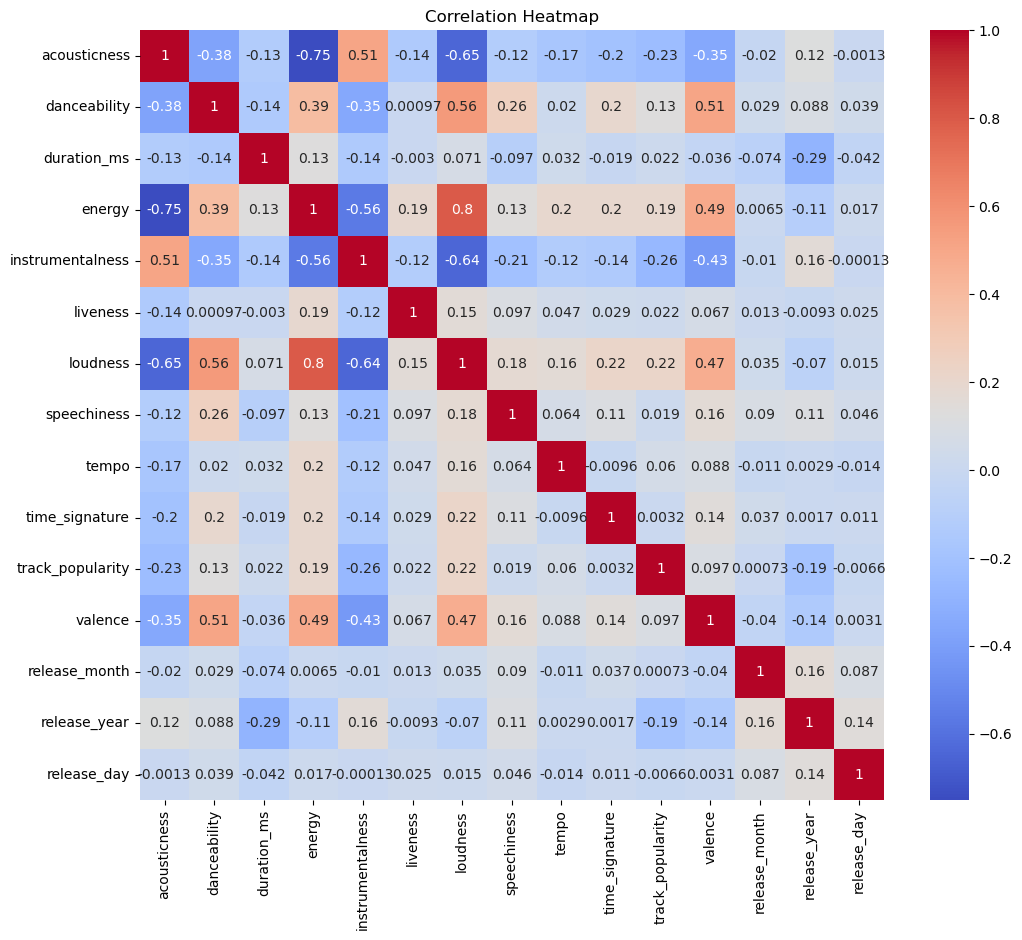

In [124]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

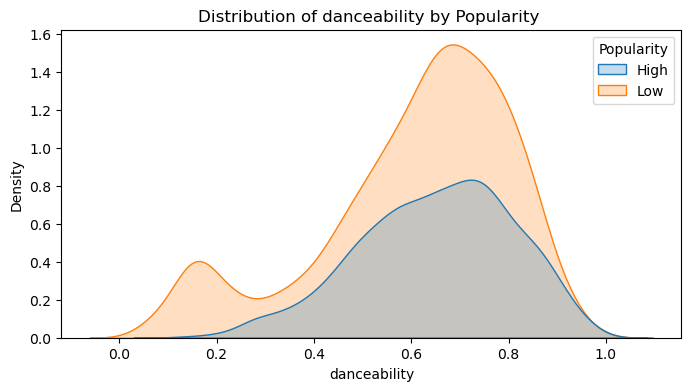

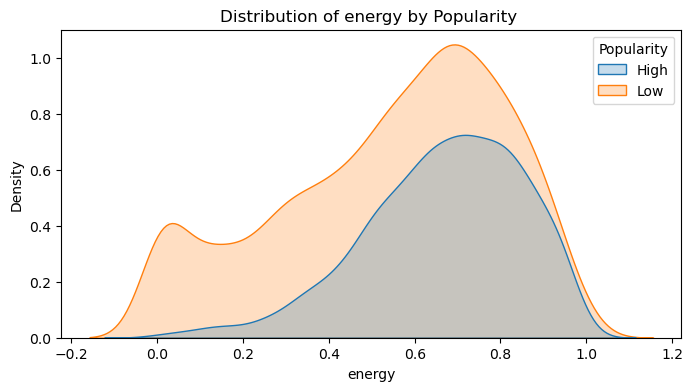

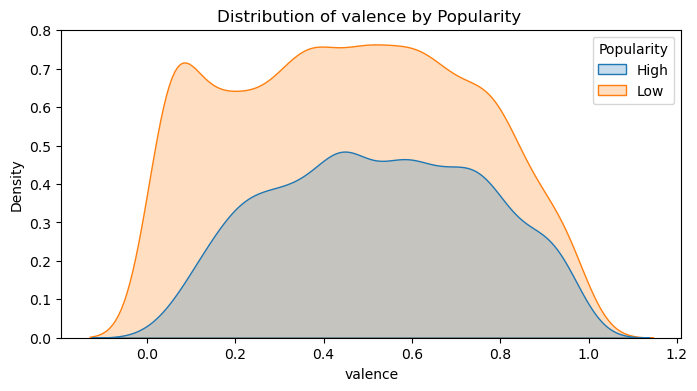

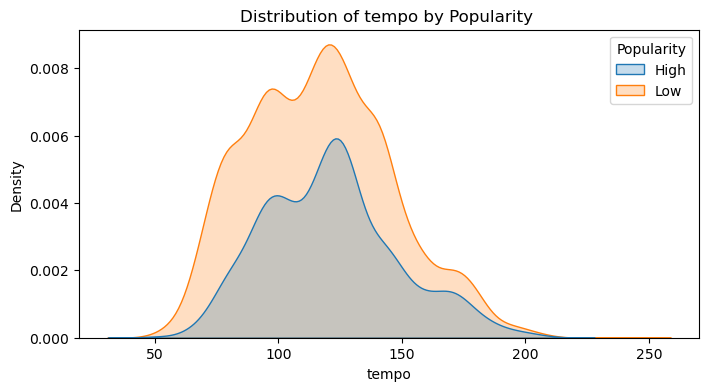

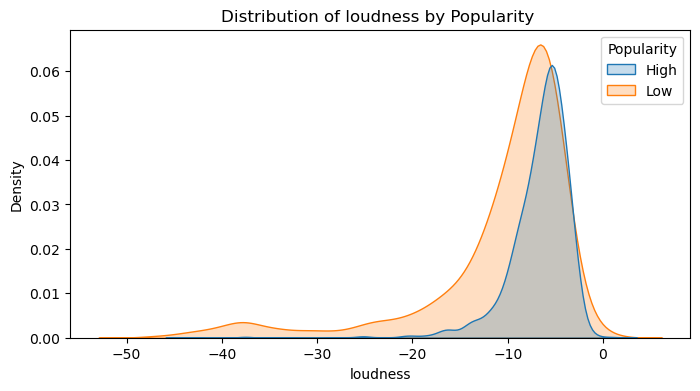

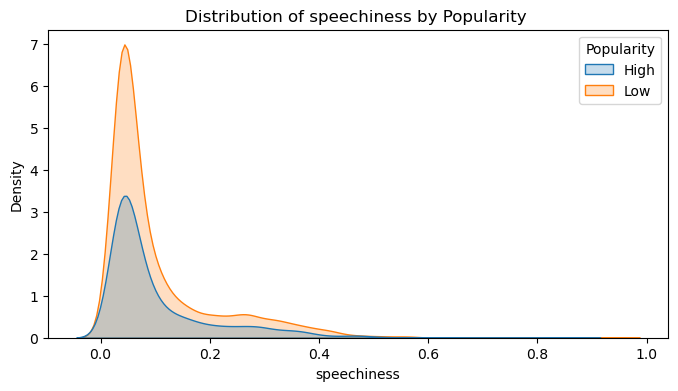

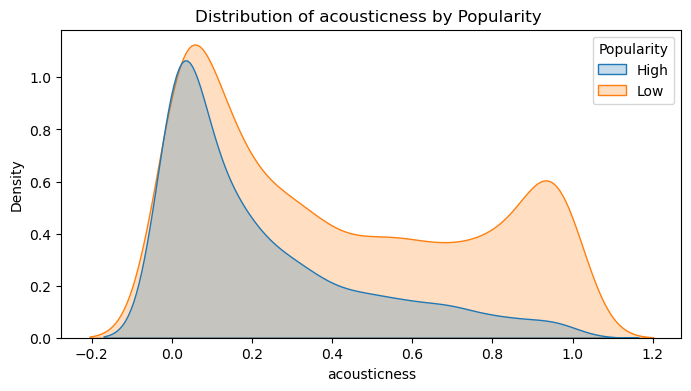

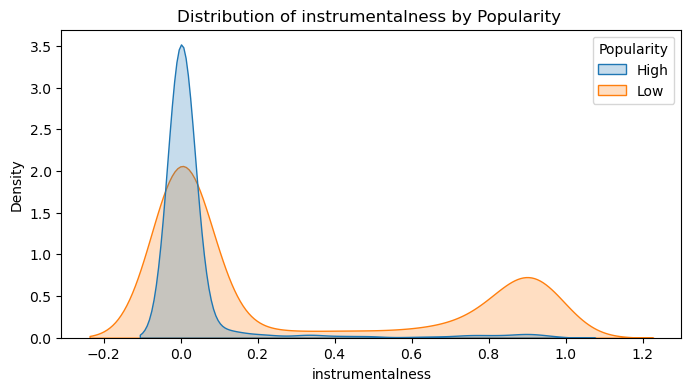

In [125]:
audio_features = ['danceability', 'energy', 'valence', 'tempo', 'loudness', 'speechiness', 'acousticness', 'instrumentalness']
for feature in audio_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=feature, hue='Popularity', fill=True)
    plt.title(f'Distribution of {feature} by Popularity ')
    plt.show()

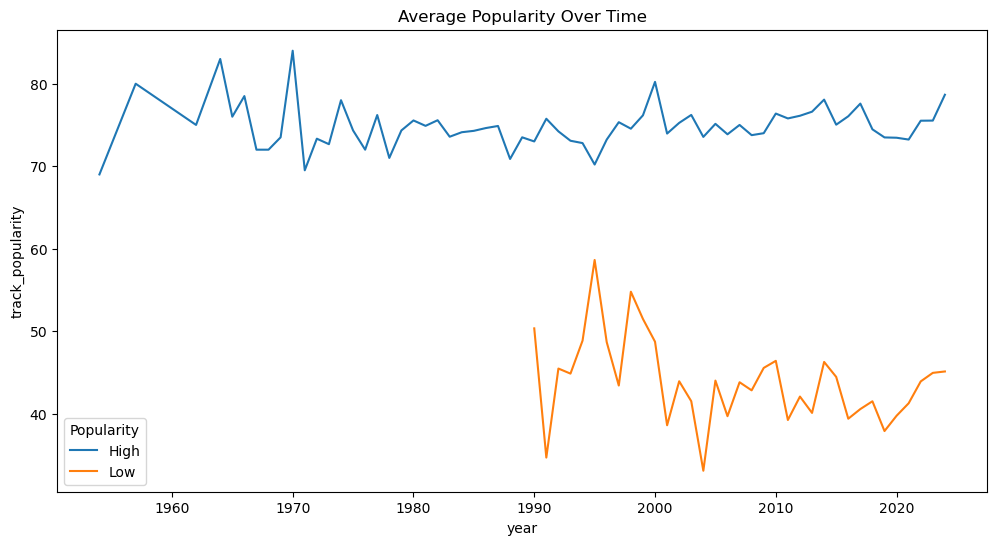

In [126]:
df['year'] = df['track_album_release_date'].dt.year
popularity_trend = df.groupby(['year', 'Popularity'])['track_popularity'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=popularity_trend, x='year', y='track_popularity', hue='Popularity')
plt.title('Average Popularity Over Time')
plt.show()

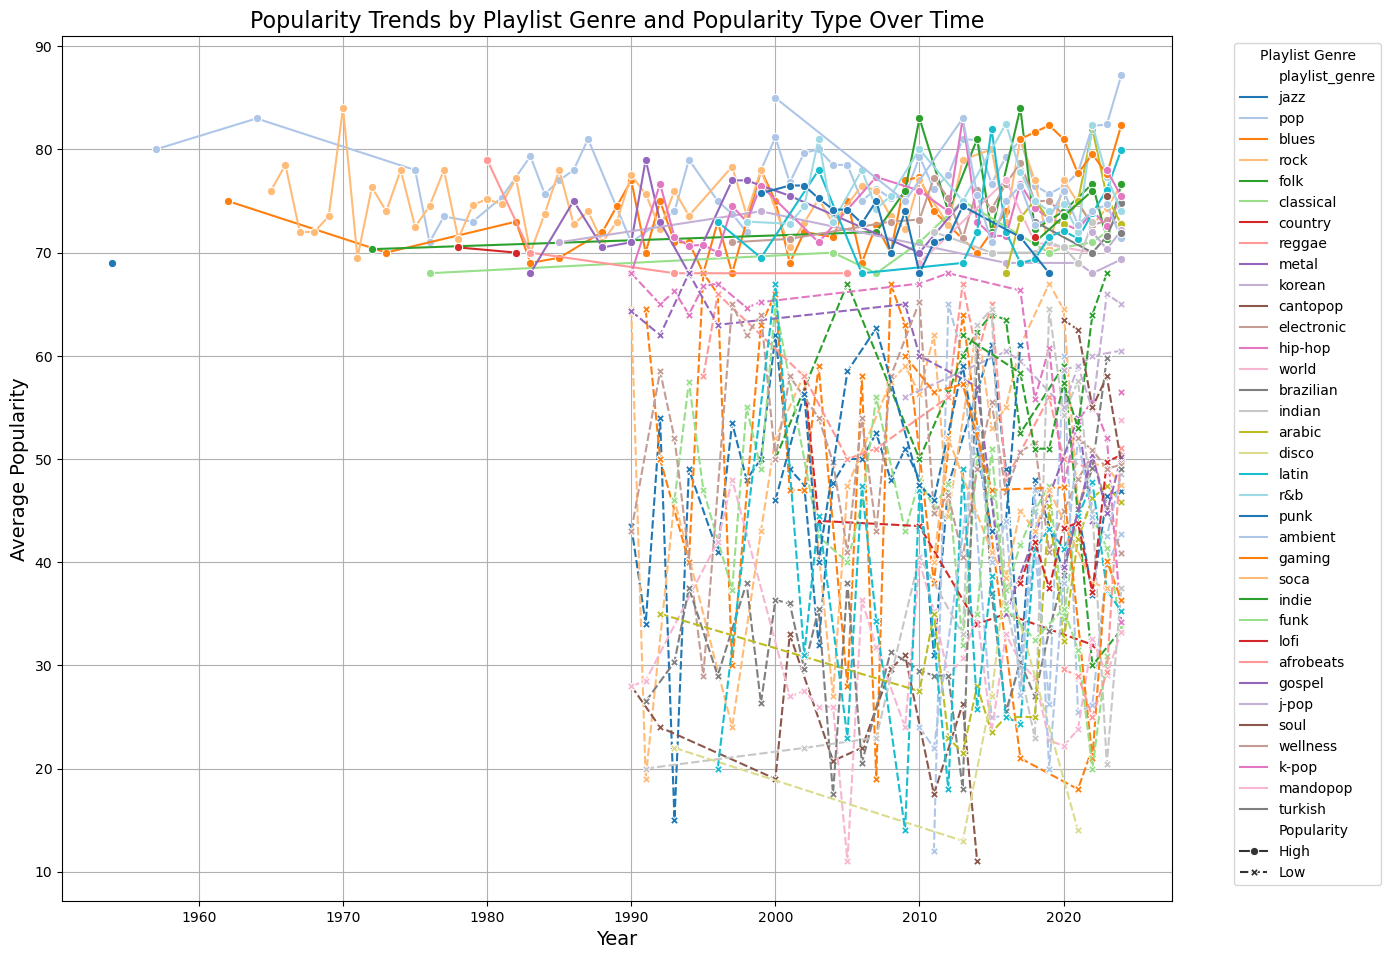

In [127]:
popularity_trends = (
    df.groupby(['year', 'playlist_genre', 'Popularity'])['track_popularity']
    .mean()
    .reset_index()
)

plt.figure(figsize=(14, 10))
sns.lineplot(
    data=popularity_trends,
    x='year',
    y='track_popularity',
    hue='playlist_genre',
    style='Popularity',
    markers=True,
    dashes=True,
    palette='tab20'
)
plt.title('Popularity Trends by Playlist Genre and Popularity Type Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Popularity', fontsize=14)
plt.legend(title='Playlist Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

In [128]:
genre_popularity = (df.groupby(['year', 'playlist_genre'])['track_popularity'].mean().reset_index())

most_popular_genres = genre_popularity.loc[genre_popularity.groupby('year')['track_popularity'].idxmax()]
least_popular_genres = genre_popularity.loc[genre_popularity.groupby('year')['track_popularity'].idxmin()]

popularity_summary = pd.merge(
    most_popular_genres,
    least_popular_genres,
    on='year',
    suffixes=('_most', '_least')
)

print(popularity_summary)

      year playlist_genre_most  track_popularity_most playlist_genre_least  \
0   1954.0                jazz              69.000000                 jazz   
1   1957.0                 pop              80.000000                  pop   
2   1962.0               blues              75.000000                blues   
3   1964.0                 pop              83.000000                  pop   
4   1965.0                rock              76.000000                 rock   
..     ...                 ...                    ...                  ...   
59  2020.0                 r&b              74.666667                world   
60  2021.0              gaming              77.666667                disco   
61  2022.0                 r&b              82.400000                 funk   
62  2023.0               k-pop              78.000000               indian   
63  2024.0                 pop              77.103093                world   

    track_popularity_least  
0                69.000000  
1    

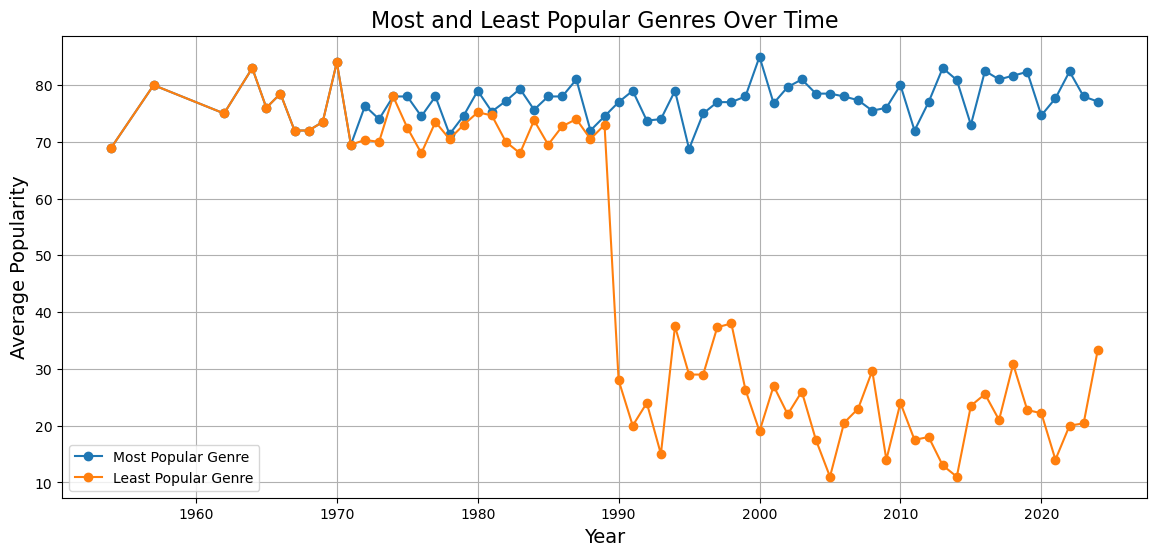

In [129]:
plt.figure(figsize=(14, 6))
plt.plot(popularity_summary['year'], popularity_summary['track_popularity_most'], label='Most Popular Genre', marker='o')
plt.plot(popularity_summary['year'], popularity_summary['track_popularity_least'], label='Least Popular Genre', marker='o')
plt.title('Most and Least Popular Genres Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Popularity', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

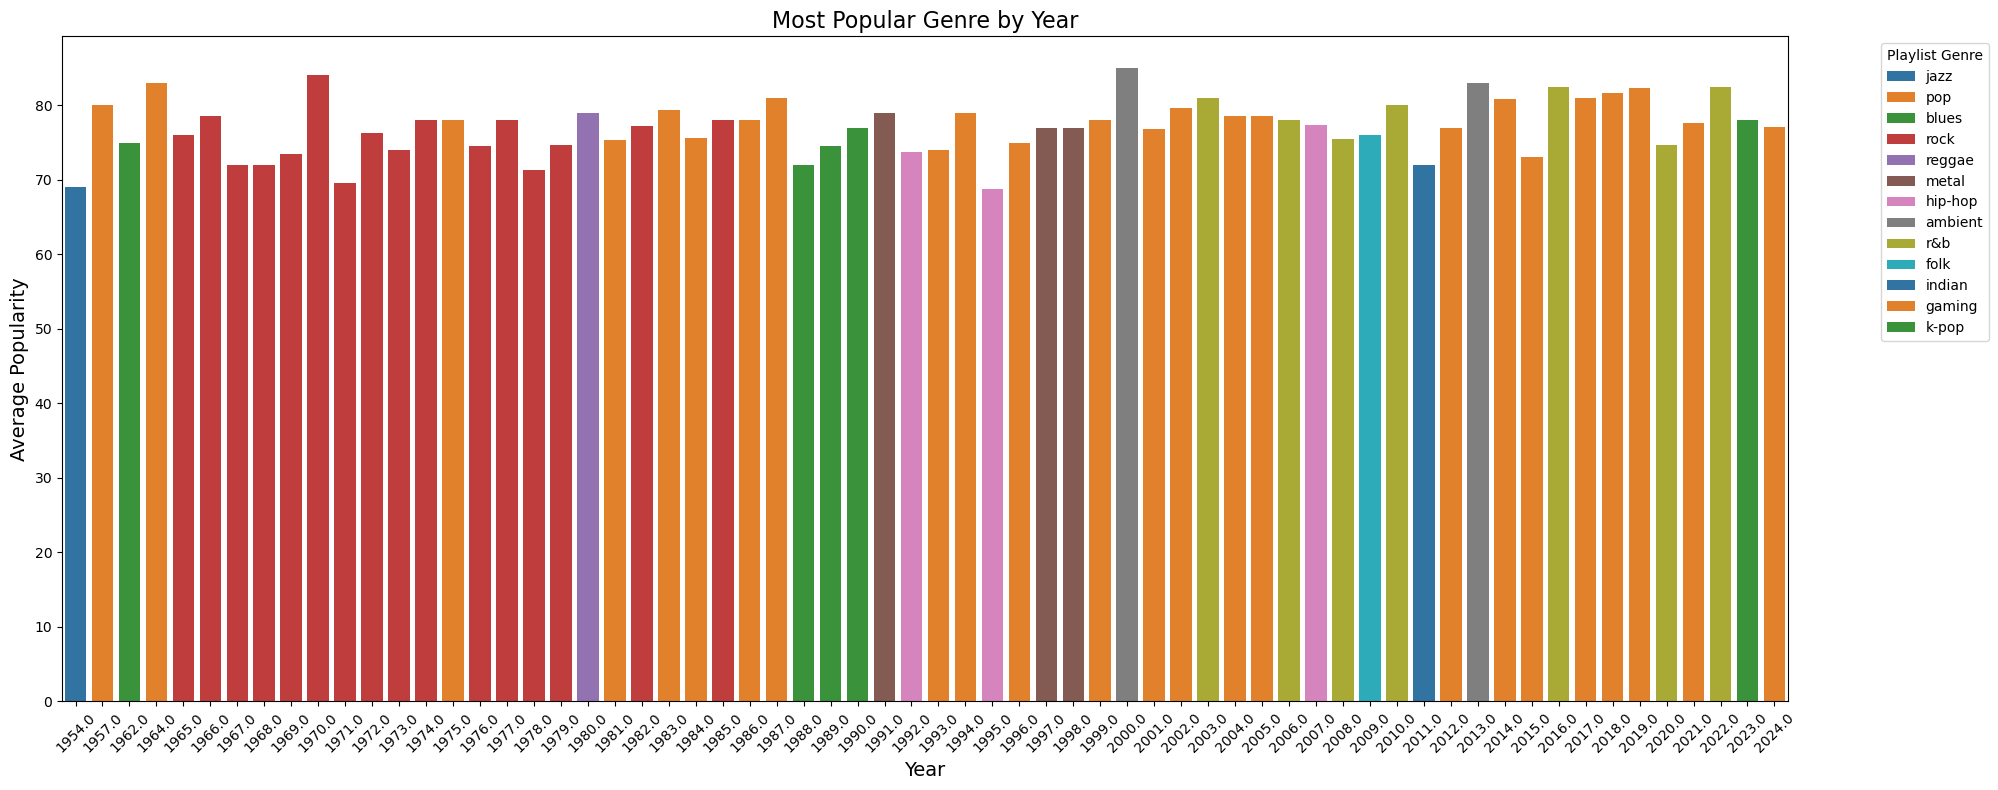

In [130]:
plt.figure(figsize=(20, 8))
sns.barplot(
    data=most_popular_genres,
    x='year',
    y='track_popularity',
    hue='playlist_genre',
    dodge=False,
    palette='tab10'
)
plt.title('Most Popular Genre by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Popularity', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Playlist Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

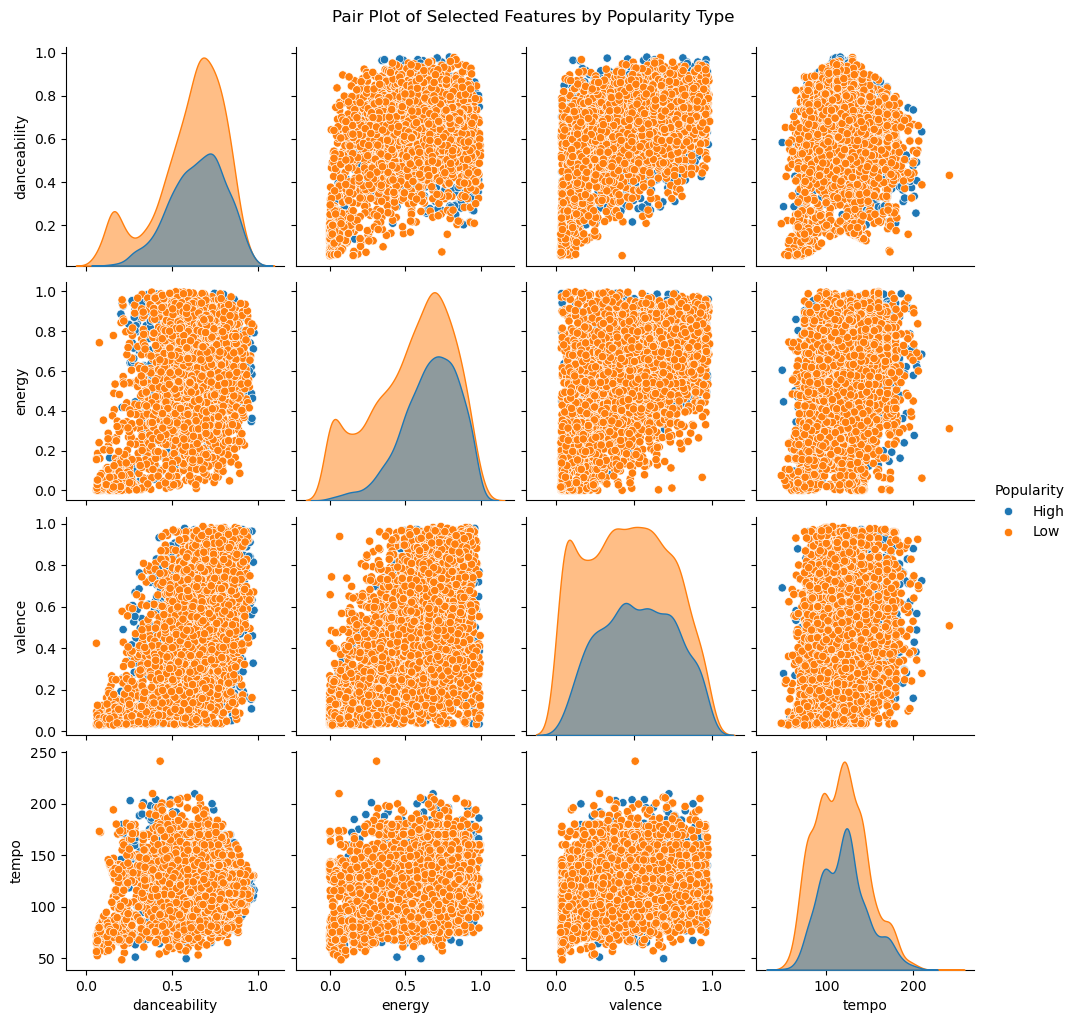

In [131]:
selected_features = ['danceability', 'energy', 'valence', 'tempo']
sns.pairplot(df[selected_features + ['Popularity']], hue='Popularity', diag_kind='kde',diag_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Selected Features by Popularity Type', y=1.02)
plt.show()

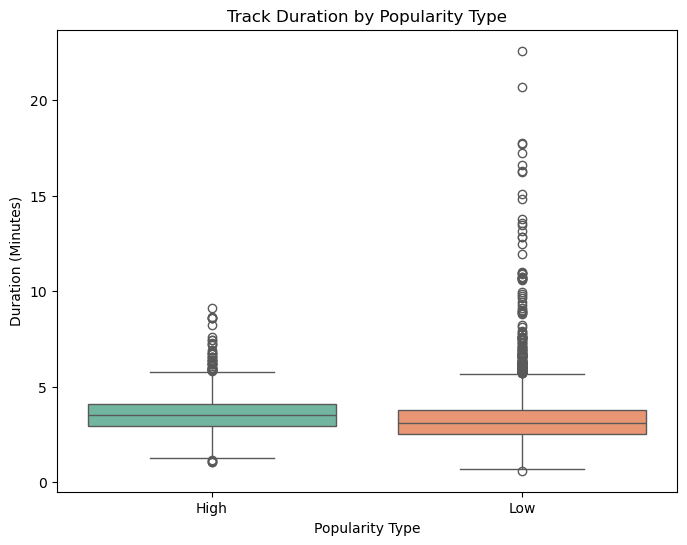

In [132]:
df['duration_min'] = df['duration_ms'] / 60000

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Popularity', y='duration_min', hue='Popularity', palette='Set2')
plt.title('Track Duration by Popularity Type')
plt.xlabel('Popularity Type')
plt.ylabel('Duration (Minutes)')
plt.show()

In [133]:
df['release_year'] = df['track_album_release_date'].dt.year

current_year = 2025 
df['song_age'] = current_year - df['release_year']


In [134]:
scaler = StandardScaler()
numerical_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                     'instrumentalness', 'liveness', 'valence', 'tempo', 'song_age']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [135]:
df=df.dropna()

In [136]:
df.isna().sum()

acousticness                0
danceability                0
duration_ms                 0
energy                      0
instrumentalness            0
key                         0
liveness                    0
loudness                    0
mode                        0
playlist_genre              0
playlist_id                 0
playlist_name               0
playlist_subgenre           0
speechiness                 0
tempo                       0
time_signature              0
track_album_id              0
track_album_name            0
track_album_release_date    0
track_artist                0
track_id                    0
track_name                  0
track_popularity            0
type                        0
valence                     0
Popularity                  0
release_month               0
release_year                0
release_day                 0
year                        0
duration_min                0
song_age                    0
dtype: int64

In [137]:
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

le = LabelEncoder()
for col in non_numeric_columns:
    df[col] = le.fit_transform(df[col].astype(str))

In [138]:
X = df.drop(['Popularity','track_popularity','track_album_release_date'], axis=1)
y = df['Popularity']

In [143]:
def run_model(model_name, X_train, X_test, y_train, y_test):

    models = {
        'Random Forest': RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42),
        'Logistic': LogisticRegression(solver='liblinear', random_state=42),
        'Decision Tree': DecisionTreeClassifier(
            criterion="gini",
            max_depth=4,
            random_state=42
        ),
        'XGBoost': XGBClassifier(
            n_estimators=200,
            learning_rate=0.05,
            max_depth=4,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            eval_metric='logloss'  
    )
    }

    if model_name not in models:
        raise ValueError(f"Unknown model name: {model_name}")

    clf = models[model_name]
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    cv_scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')

    print("CV Accuracy Scores:", cv_scores)
    print("Mean Accuracy:", cv_scores.mean())
    print("Std Dev:", cv_scores.std())

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    print(f'\nClassification Report for {model_name}')
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    
    print(f"\nFeature Importance for {model_name}:\n")

    if model_name in ['Random Forest', 'Decision Tree', 'XGBoost']:
        importances = clf.feature_importances_

    elif model_name == 'Logistic':
        importances = np.abs(clf.coef_[0]) 
    fi_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=fi_df, x='Importance', y='Feature')
    plt.title(f'Feature Importance for {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

    return y_pred,fi_df,clf


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

CV Accuracy Scores: [0.68308921 0.65645806 0.668      0.67866667 0.72      ]
Mean Accuracy: 0.681242787394585
Std Dev: 0.021456101936455425

Classification Report for Logistic
              precision    recall  f1-score   support

           0       0.55      0.06      0.11       345
           1       0.64      0.97      0.77       594

    accuracy                           0.64       939
   macro avg       0.60      0.52      0.44       939
weighted avg       0.61      0.64      0.53       939



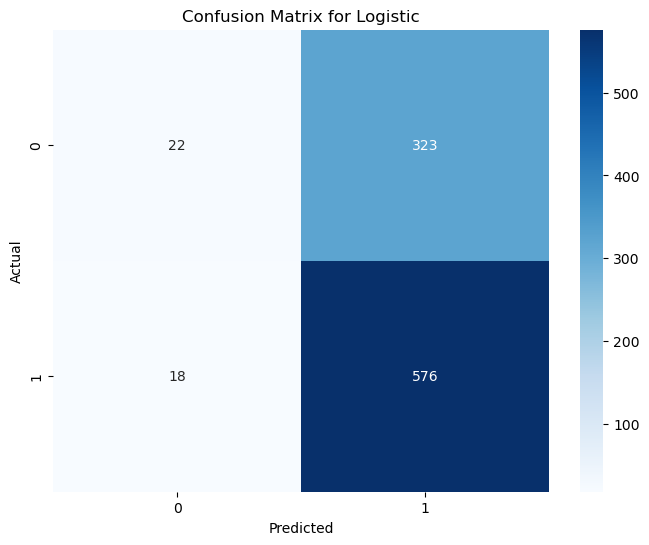


Feature Importance for Logistic:



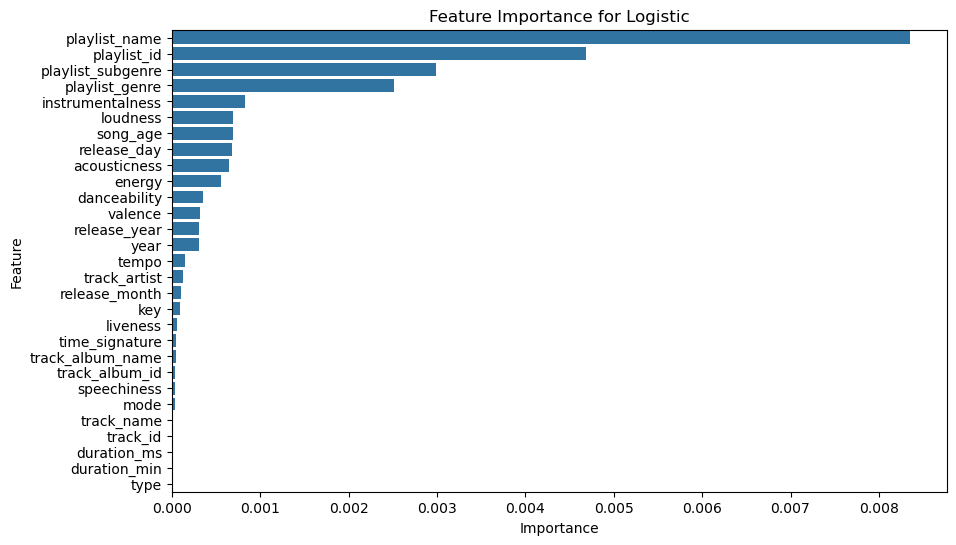

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [145]:
run_model("Logistic", X_train, X_test, y_train, y_test)


CV Accuracy Scores: [0.87616511 0.88015979 0.884      0.85333333 0.87866667]
Mean Accuracy: 0.8744649800266313
Std Dev: 0.010866816894879328

Classification Report for XGBoost
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       345
           1       0.86      0.94      0.90       594

    accuracy                           0.87       939
   macro avg       0.87      0.84      0.85       939
weighted avg       0.87      0.87      0.86       939



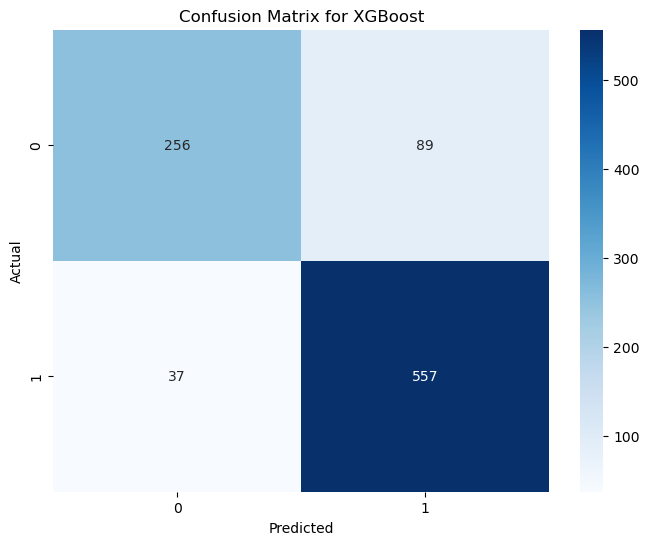


Feature Importance for XGBoost:



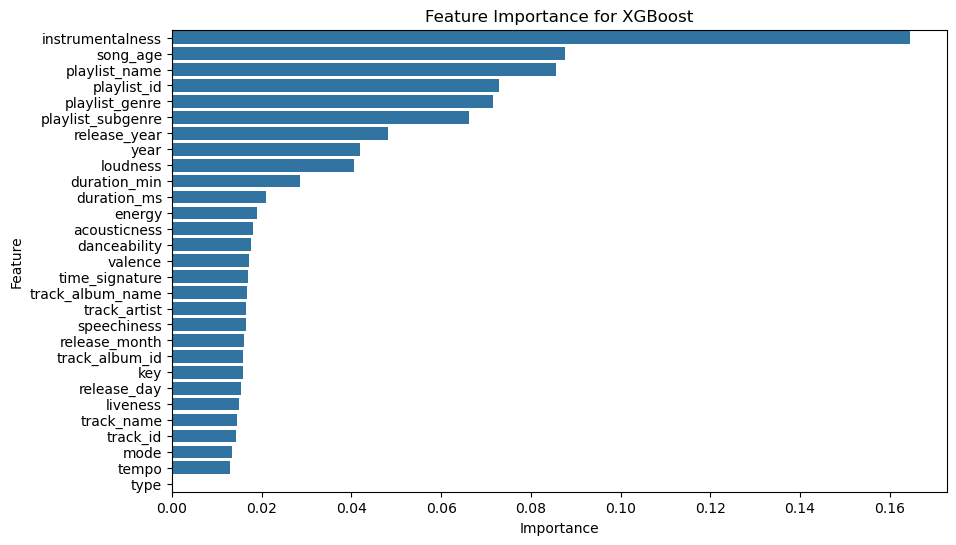

(array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
        0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
        1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 

In [146]:
run_model("XGBoost", X_train, X_test, y_train, y_test)


CV Accuracy Scores: [0.78695073 0.8069241  0.79733333 0.78266667 0.81866667]
Mean Accuracy: 0.7985083000443852
Std Dev: 0.01313849854161558

Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.80      0.52      0.63       345
           1       0.77      0.93      0.84       594

    accuracy                           0.78       939
   macro avg       0.79      0.72      0.73       939
weighted avg       0.78      0.78      0.76       939



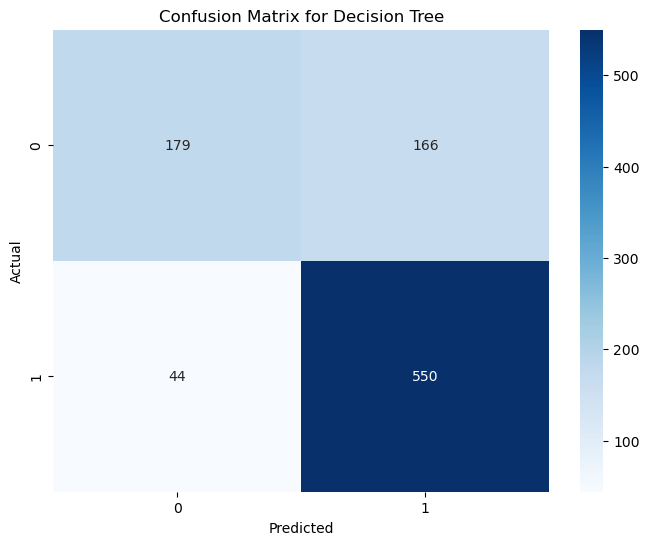


Feature Importance for Decision Tree:



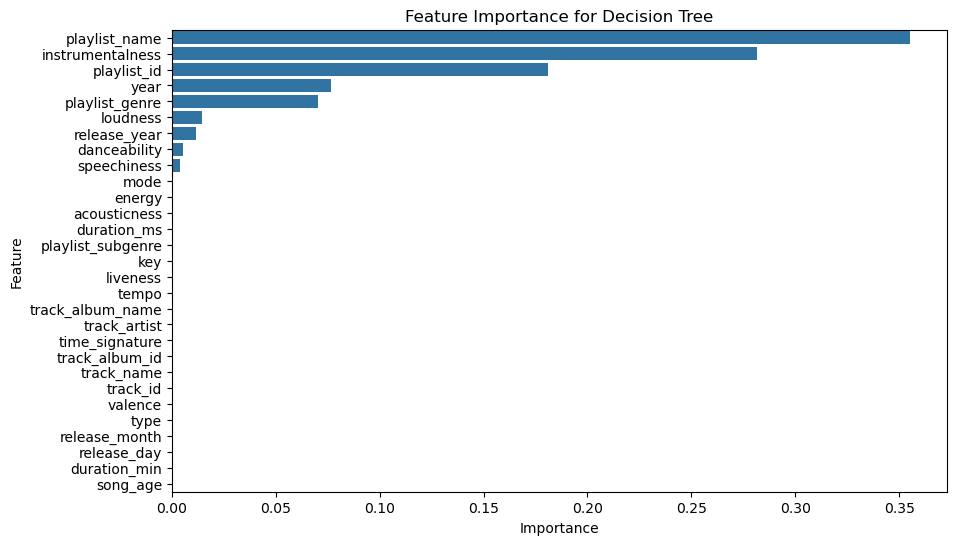

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 

In [147]:
run_model("Decision Tree", X_train, X_test, y_train, y_test)


CV Accuracy Scores: [0.86817577 0.86950732 0.88266667 0.85466667 0.87333333]
Mean Accuracy: 0.8696699511762095
Std Dev: 0.009051989467308766

Classification Report for Random Forest
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       345
           1       0.85      0.95      0.89       594

    accuracy                           0.86       939
   macro avg       0.87      0.83      0.84       939
weighted avg       0.86      0.86      0.85       939



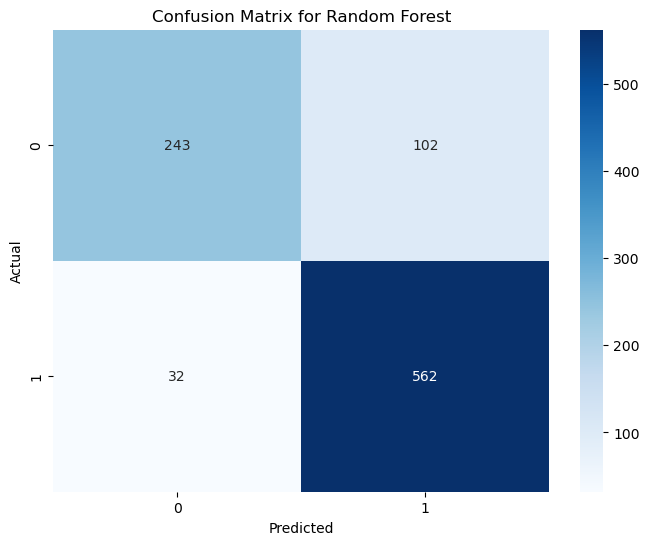


Feature Importance for Random Forest:



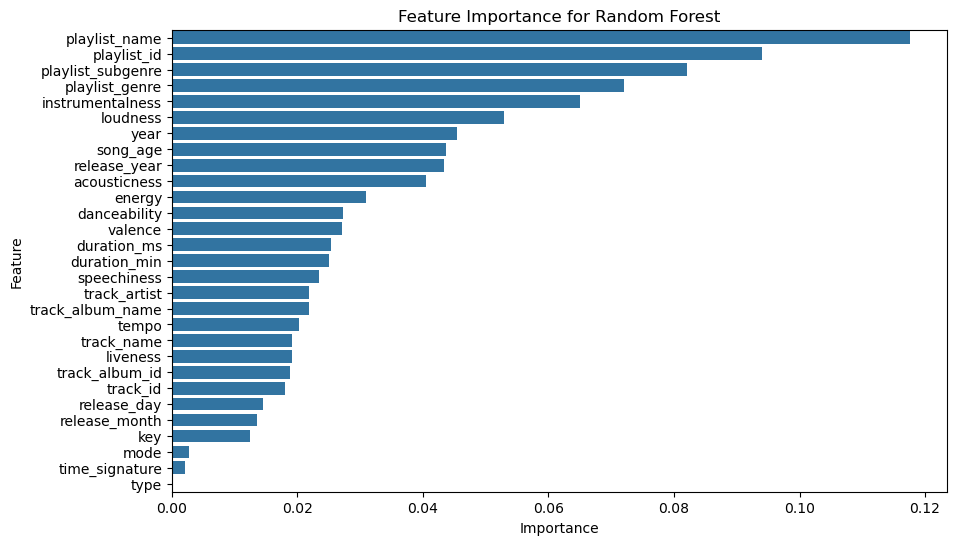

In [148]:
y_pred, fi_df, rf_model = run_model('Random Forest', X_train, X_test, y_train, y_test)


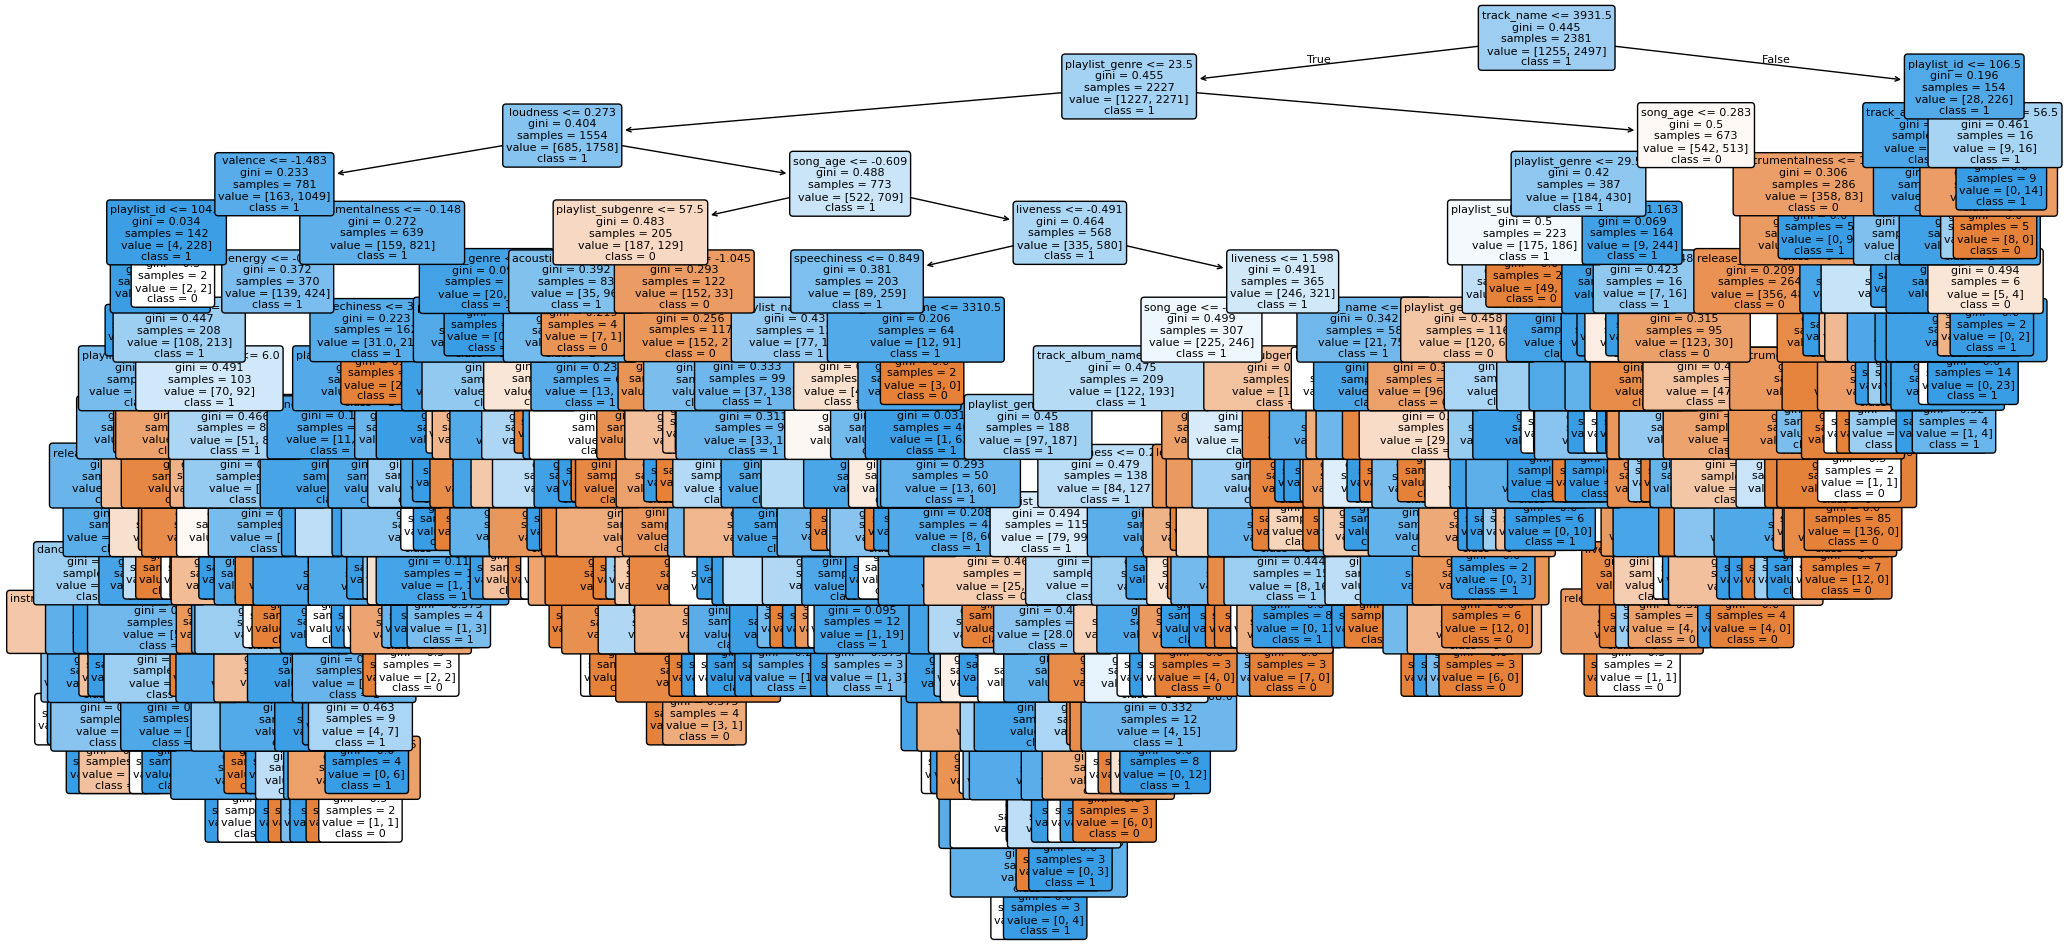

In [ ]:
num_trees_to_plot = 3

for i in range(num_trees_to_plot):
    estimator = rf_model.estimators_[i]
    
    plt.figure(figsize=(25, 12))
    plt.title(f"Tree {i}")
    plot_tree(
        estimator,
        feature_names=X_train.columns,
        class_names=[str(c) for c in rf_model.classes_],
        filled=True,
        rounded=True,
        fontsize=8
    )
    plt.show()